In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from tabulate import tabulate

In [2]:
df = pd.read_csv('../Data/Validating/character-predictions-validating-encoded.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   male                     584 non-null    int64  
 1   dateOfBirth              584 non-null    float64
 2   dateOfDeath              584 non-null    float64
 3   book1                    584 non-null    int64  
 4   book2                    584 non-null    int64  
 5   book3                    584 non-null    int64  
 6   book4                    584 non-null    int64  
 7   book5                    584 non-null    int64  
 8   isMarried                584 non-null    int64  
 9   isNoble                  584 non-null    int64  
 10  age                      584 non-null    float64
 11  numDeadRelations         584 non-null    int64  
 12  boolDeadRelations        584 non-null    int64  
 13  isPopular                584 non-null    int64  
 14  popularity               5

Standarizing only chosen variables

In [4]:
scaler = StandardScaler()

selected_columns = ['age', 'dateOfBirth', 'dateOfDeath', 'popularity', 'house_encoded']

scaled_data = scaler.fit_transform(df[selected_columns])
df_scaled = df.copy()
df_scaled[selected_columns] = scaled_data



## k-Means

Optimal number of clusters for k-Means

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [7]:
def metrics_plots(max_k=10, df=None):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(df)
        score.append(kmeans.score(df))
        score_kmeans_s.append(silhouette_score(df, kmeans.labels_, metric='euclidean'))
        score_kmeans_c.append(calinski_harabasz_score(df, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(df, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
 
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 

    plt.figure(figsize=(15, 10))
    for i in range(len(list_scores)):
        plt.subplot(2, 2, i+1)
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')

    plt.tight_layout()
    plt.show()


C:\Users\domin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\domin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


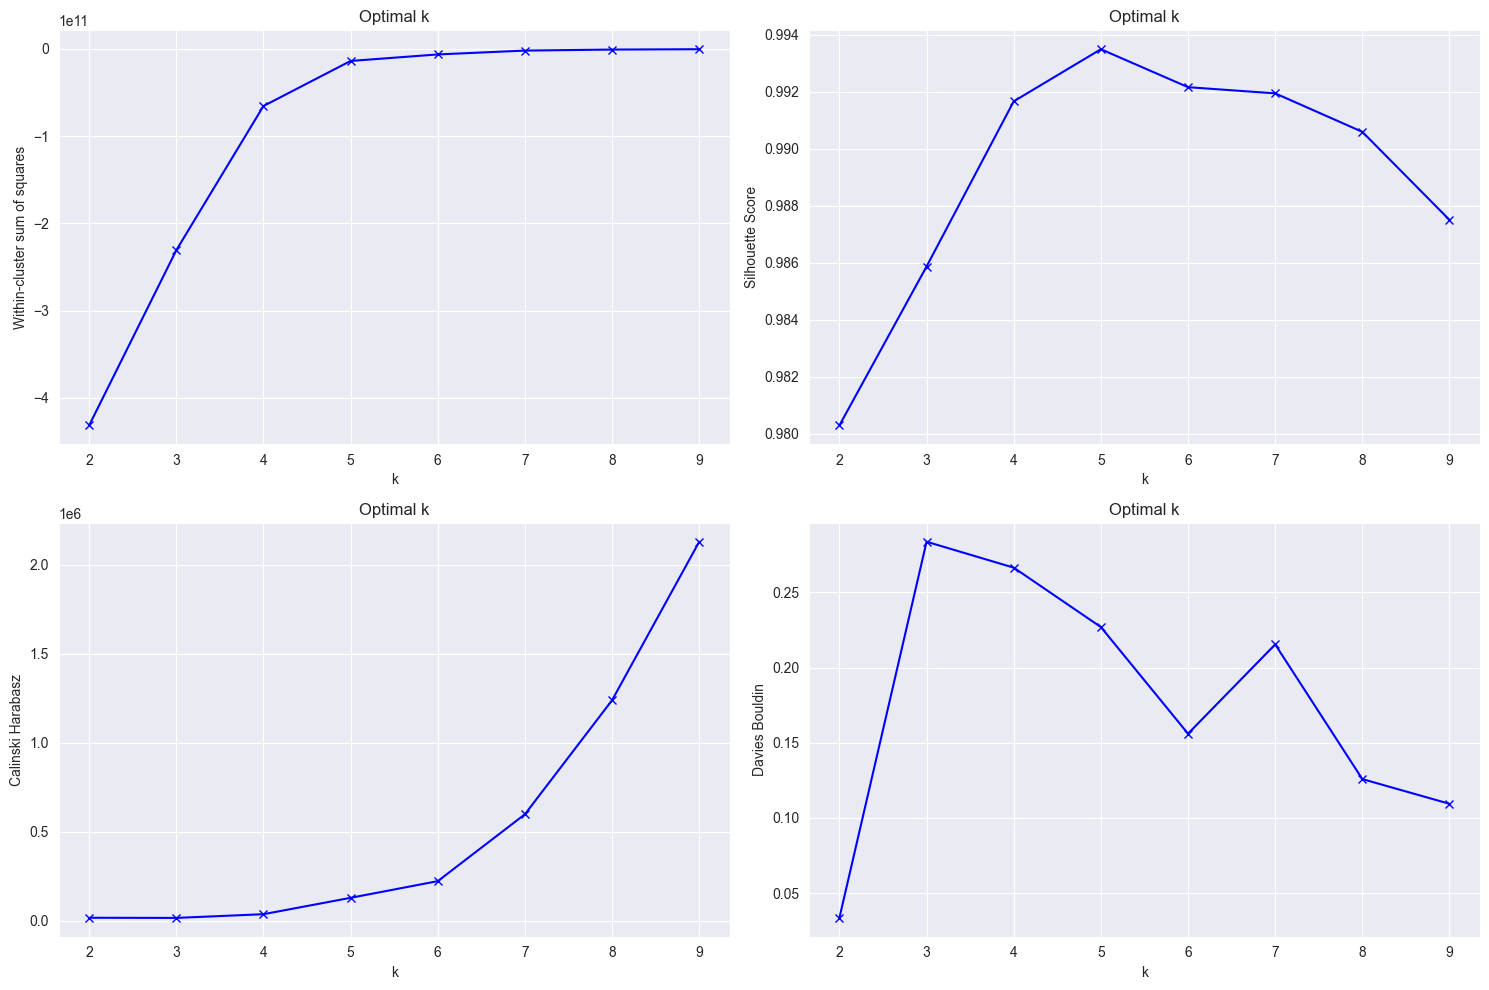

In [8]:
metrics_plots(max_k=10, df=df)

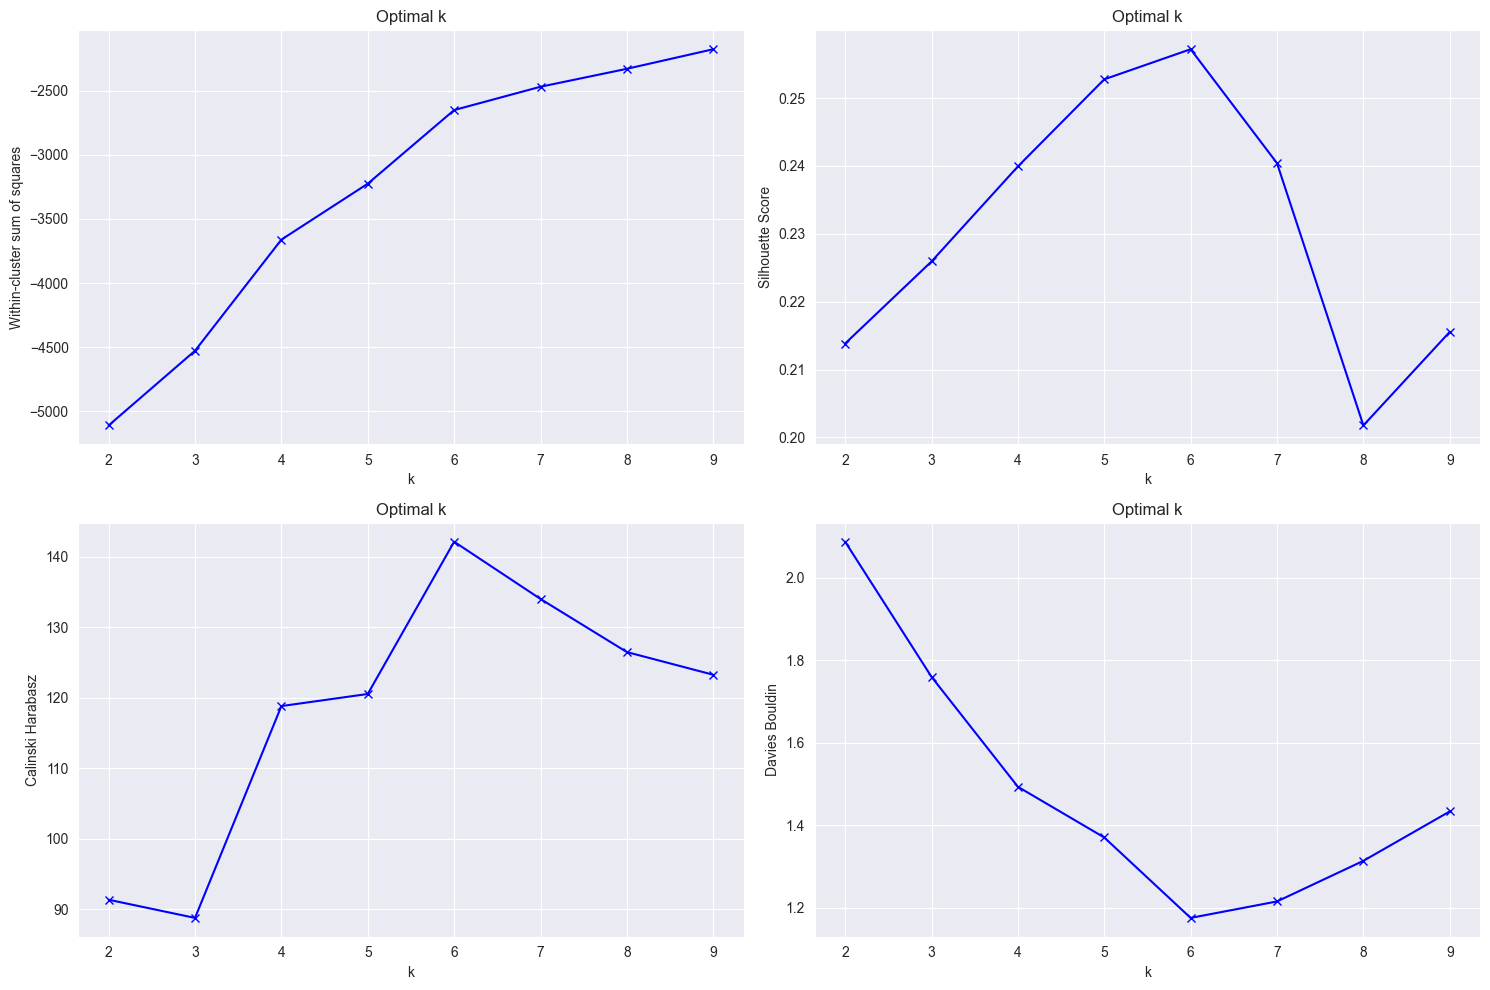

In [9]:
metrics_plots(max_k=10, df=df_scaled)

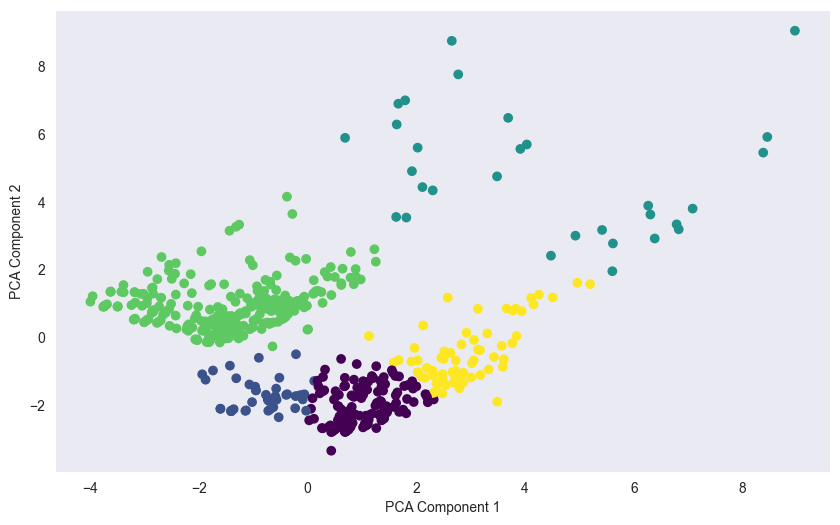

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.grid()
# plt.show()

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()


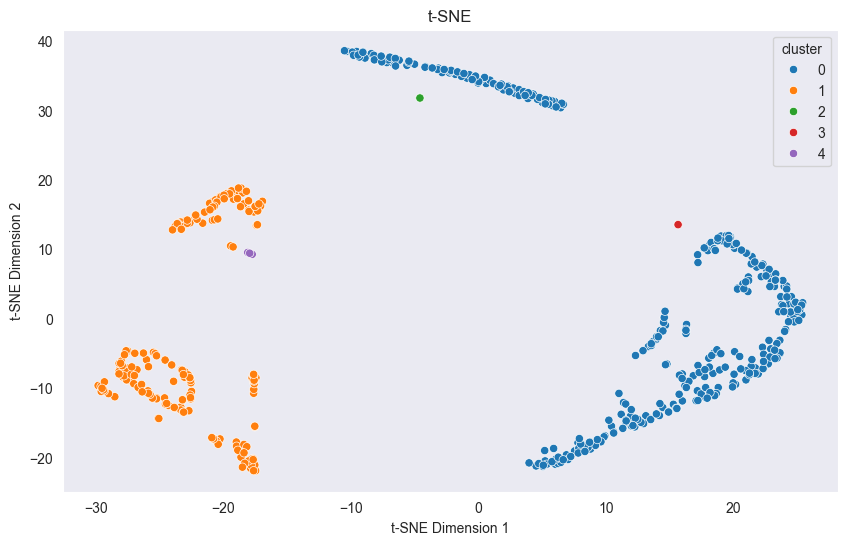

In [11]:
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df)

# plt.figure(figsize=(10, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.5)
# plt.title('t-SNE')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.grid()
# plt.show()

kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['cluster'], palette='tab10', legend='full')


plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

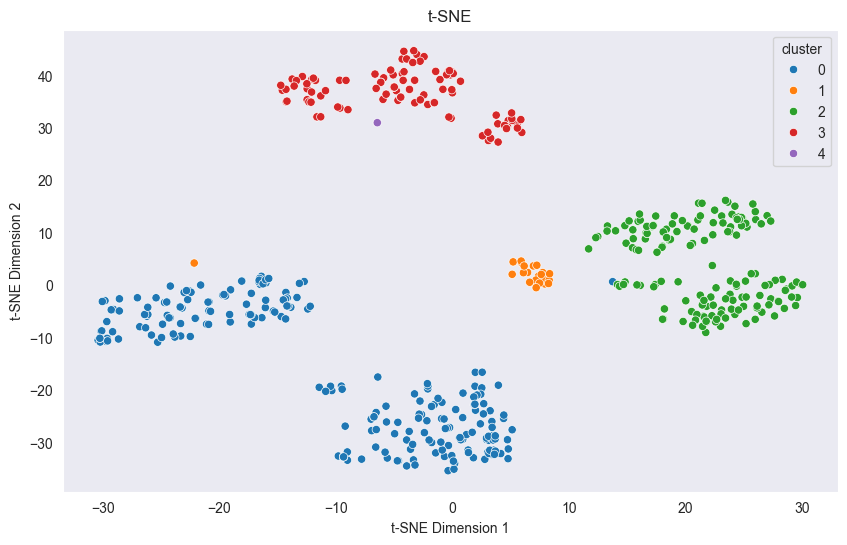

In [12]:
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df_scaled)

# plt.figure(figsize=(10, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.5)
# plt.title('t-SNE')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.grid()
# plt.show()

kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df_scaled['cluster'], palette='tab10', legend='full')


plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

## Mini Batch

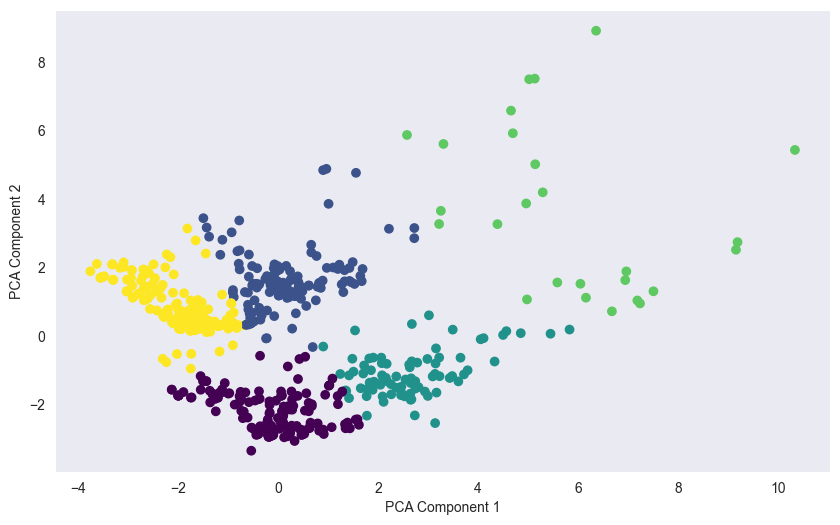

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.grid()
# plt.show()

miniBatchKmeans = cluster.MiniBatchKMeans(n_clusters=5)
miniBatchKmeans.fit(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=miniBatchKmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()


## DBSCAN

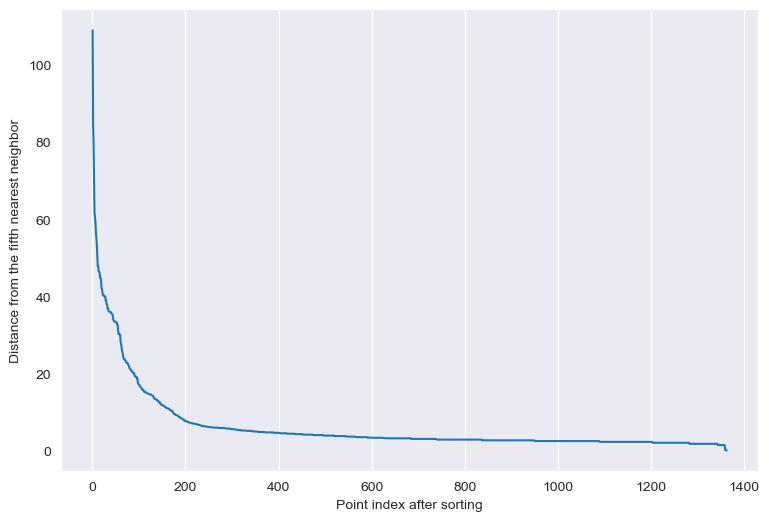

In [29]:
minPts = 4
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Point index after sorting')
plt.ylabel('Distance from the fifth nearest neighbor')
ax1.plot(list(range(1,df.shape[0]+1)), distanceDec)

#plt.xscale('log')

plt.grid(axis='y')

plt.show() 

In [ ]:
from sklearn.cluster import DBSCAN
import plotly.express as px

pca = PCA(n_components=3)
eps = 15
minPts = 6

data_reduced_3d = pca.fit_transform(df)

dbs = DBSCAN(eps=eps, min_samples=minPts)

y_dbs = dbs.fit_predict(data_reduced_3d)

df_reduced_3d = pd.DataFrame(data=data_reduced_3d, columns=['PC1', 'PC2', 'PC3'])

df_reduced_3d['Cluster'] = y_dbs

fig = px.scatter_3d(df_reduced_3d, x='PC1', y='PC2', z='PC3', color='Cluster', title='DBSCAN Clustering (PCA-reduced 3D)')
fig.show()


In [31]:
pca = PCA(n_components=2)

eps = 15
minPts = 4

data_reduced_2d = pca.fit_transform(df)

dbs = DBSCAN(eps=eps, min_samples=minPts)

y_dbs = dbs.fit_predict(data_reduced_2d)

df_reduced_2d = pd.DataFrame(data=data_reduced_2d, columns=['PC1', 'PC2'])

df_reduced_2d['Cluster'] = y_dbs

fig = px.scatter(df_reduced_2d, x='PC1', y='PC2', color='Cluster', title='DBSCAN Clustering (PCA-reduced 2D)')
fig.show()


## Mean Shift

In [32]:
from sklearn.cluster import MeanShift


# Mean Shift clustering
mean_shift = MeanShift()
mean_shift.fit(scaled_data)
labels = mean_shift.labels_

# Dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
data_reduced_2d = pca.fit_transform(scaled_data)

# Visualize 2D
fig_2d = px.scatter(
    x=data_reduced_2d[:, 0], y=data_reduced_2d[:, 1], color=labels, 
    title="Mean Shift Clustering (2D PCA-reduced)", labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'}
)
fig_2d.show()

# Dimensionality reduction to 3D for visualization
pca = PCA(n_components=3)
data_reduced_3d = pca.fit_transform(scaled_data)

# Visualize 3D
fig_3d = px.scatter_3d(
    x=data_reduced_3d[:, 0], y=data_reduced_3d[:, 1], z=data_reduced_3d[:, 2], 
    color=labels, title="Mean Shift Clustering (3D PCA-reduced)",
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'}
)
fig_3d.show()


C:\Users\domin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\domin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


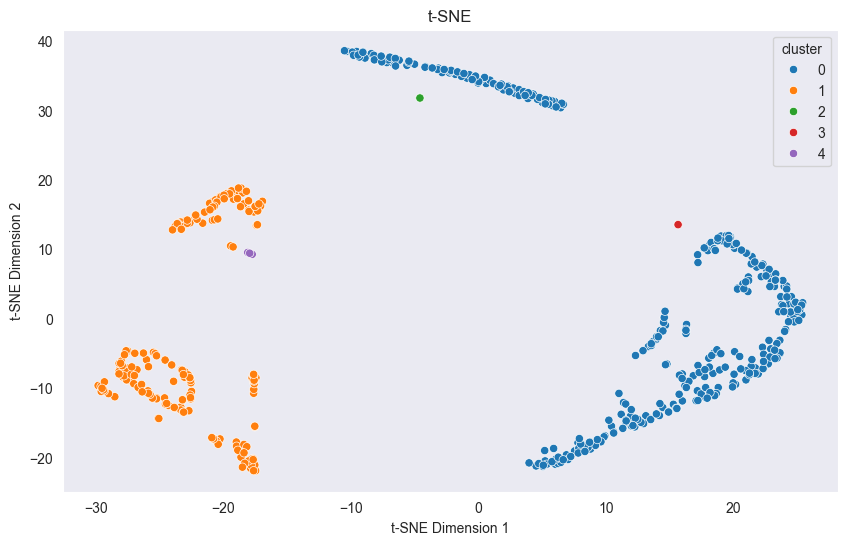

In [5]:
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df)

# plt.figure(figsize=(10, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.5)
# plt.title('t-SNE')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.grid()
# plt.show()

kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['cluster'], palette='tab10', legend='full')


plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

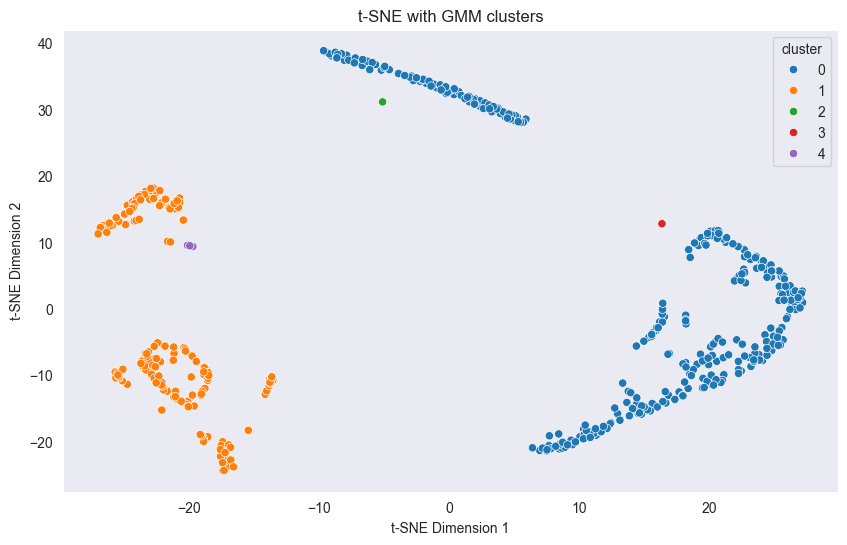

In [6]:
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df)

gmm = GaussianMixture(n_components=5, random_state=123)
gmm.fit(df)
df['cluster'] = gmm.predict(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['cluster'], palette='tab10', legend='full')

plt.title('t-SNE with GMM clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=123)
dbscan = DBSCAN(eps=1.0, min_samples=1)
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=123)
gmm = GaussianMixture(n_components=5, random_state=123)
meanshift = MeanShift()

models = {
    "KMeans": kmeans,
    "DBSCAN": dbscan,
    "MiniBatchKMeans": minibatch_kmeans,
    "GMM": gmm,
    "MeanShift": meanshift
}

results = []

for name, model in models.items():
    if name == "GMM":
        labels = model.fit_predict(df)
    else:
        model.fit(df)
        labels = model.labels_
    
    if name == "DBSCAN":
        unique_labels = set(labels)
        unique_labels.discard(-1)
        if len(unique_labels) > 1:
            labels = labels[labels != -1]
            df_filtered = df[labels != -1]
            silhouette_avg = silhouette_score(df_filtered, labels)
            calinski_harabasz = calinski_harabasz_score(df_filtered, labels)
            davies_bouldin = davies_bouldin_score(df_filtered, labels)
        else:
            silhouette_avg = np.nan
            calinski_harabasz = np.nan
            davies_bouldin = np.nan
    else:
        if len(np.unique(labels)) > 1:
            silhouette_avg = silhouette_score(df, labels)
            calinski_harabasz = calinski_harabasz_score(df, labels)
            davies_bouldin = davies_bouldin_score(df, labels)
        else:
            silhouette_avg = np.nan
            calinski_harabasz = np.nan
            davies_bouldin = np.nan
    
    results.append([name, silhouette_avg, calinski_harabasz, davies_bouldin])

columns = ["Model", "Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"]
results_df = pd.DataFrame(results, columns=columns)

print(tabulate(results_df, headers='keys', tablefmt='grid'))

metrics = ["Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Model'], results_df[metric], color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [9]:
#import dbscan
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
#import mini batch kmeans, gmm, and mean shift
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift

kmeans = KMeans(n_clusters=10, random_state=123)
dbscan = DBSCAN(eps=1.0, min_samples=1)
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, random_state=123)
gmm = GaussianMixture(n_components=10, random_state=123)
meanshift = MeanShift()

models = {
    "KMeans": kmeans,
    "DBSCAN": dbscan,
    "MiniBatchKMeans": minibatch_kmeans,
    "GMM": gmm,
    "MeanShift": meanshift
}

results = []

for name, model in models.items():
    if name == "GMM":
        labels = model.fit_predict(df)
    else:
        model.fit(df)
        labels = model.labels_
    
    if name == "DBSCAN":
        unique_labels = set(labels)
        unique_labels.discard(-1)
        if len(unique_labels) > 1:
            labels = labels[labels != -1]
            df_filtered = df[labels != -1]
            silhouette_avg = silhouette_score(df_filtered, labels)
            calinski_harabasz = calinski_harabasz_score(df_filtered, labels)
            davies_bouldin = davies_bouldin_score(df_filtered, labels)
        else:
            silhouette_avg = np.nan
            calinski_harabasz = np.nan
            davies_bouldin = np.nan
    else:
        if len(np.unique(labels)) > 1: 
            silhouette_avg = silhouette_score(df, labels)
            calinski_harabasz = calinski_harabasz_score(df, labels)
            davies_bouldin = davies_bouldin_score(df, labels)
        else:
            silhouette_avg = np.nan
            calinski_harabasz = np.nan
            davies_bouldin = np.nan
    
    results.append([name, silhouette_avg, calinski_harabasz, davies_bouldin])

columns = ["Model", "Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"]
results_df = pd.DataFrame(results, columns=columns)

print(tabulate(results_df, headers='keys', tablefmt='grid'))

+----+-----------------+--------------------+---------------------------+------------------------+
|    | Model           |   Silhouette Score |   Calinski-Harabasz Index |   Davies-Bouldin Index |
+====+=================+====================+===========================+========================+
|  0 | KMeans          |           0.987484 |               1.38455e+08 |            0.00569646  |
+----+-----------------+--------------------+---------------------------+------------------------+
|  1 | DBSCAN          |           0.010255 |               1.89047e+15 |            0.000134211 |
+----+-----------------+--------------------+---------------------------+------------------------+
|  2 | MiniBatchKMeans |           0.69716  |           36016.1         |            0.595643    |
+----+-----------------+--------------------+---------------------------+------------------------+
|  3 | GMM             |           0.987484 |               1.38455e+08 |            0.00569646  |
+----+----